# Validating and Cleaning of data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pet_box_df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/pet_supplies_2212.csv')
pet_box_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [26]:
pet_box_df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


## Missing values
At first glance I noticed the **rating** column has **150** missing values. These are replaced with 0 using the fillna() method.

When first looking at the **category** column (the first five rows), I see no problem. However, I then check all the values listed and find '-' instead of a missing value. I replace them with 'Unknown' (**45** unknown values).

I look through the **price** column and when I try to find out the median, max value etc. I noticed this isn't possible because there is a string amongst the float numbers. To be able to change the string into the median I first turn it into a NaN (turns out to be **150** missing values), then I use the fillna() method and replace the missing value with the overall price median. I also convert the type of the column from object to float.

## Non-matching values
In the **size** column we can quickly conclude that the different sizes are not written in the same format and do not match the description given. They are written as Medium, medium and MEDIUM. To fix that I use the replace method and turn 'medium' and 'MEDIUM' into 'Medium'. I do this with all the sizes.

The other columns had no missing or non-matching values.

In [81]:
pet_box_df['size'].replace(['MEDIUM','medium','small','large','SMALL','LARGE'],['Medium','Medium','Small','Large','Small','Large'], inplace=True)
pet_box_df['category'].replace(['-'],['Unknown'],inplace=True)
pet_box_df['price'].replace('unlisted', np.nan, inplace=True)
convert_dict = {'price':float}
pet_box_df = pet_box_df.astype(convert_dict)
pet_box_df['price'].apply(lambda x: round(x, 2))
pet_box_new_df = pet_box_df.fillna({
    'rating': 0,
    'price' : pet_box_df['price'].median()
})
pet_box_new_df.head(25)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.100,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.980,963.60,6.0,0
2,3,Food,Dog,Medium,31.230,898.30,5.0,1
3,4,Medicine,Cat,Small,24.950,982.15,6.0,1
4,5,Housing,Cat,Small,26.180,832.63,7.0,1
5,6,Housing,Dog,Small,30.770,874.58,7.0,0
6,7,Housing,Dog,Small,31.040,875.07,5.0,0
7,8,Toys,Cat,Medium,28.900,1074.31,4.0,0
8,9,Equipment,Fish,Medium,17.820,503.67,5.0,0
9,10,Medicine,Dog,Medium,24.930,838.88,8.0,0


## Repeat purchases
We can quickly see with the visualisation that the repeat purchases are balanced through the categories food, toys, medicine and housing however the unknown and accessory category are below average and the equipment category is well above average. This means that the equipment category is the category with the most repeat purchases.

/Users/jacquelinegustavsson/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 250.0)

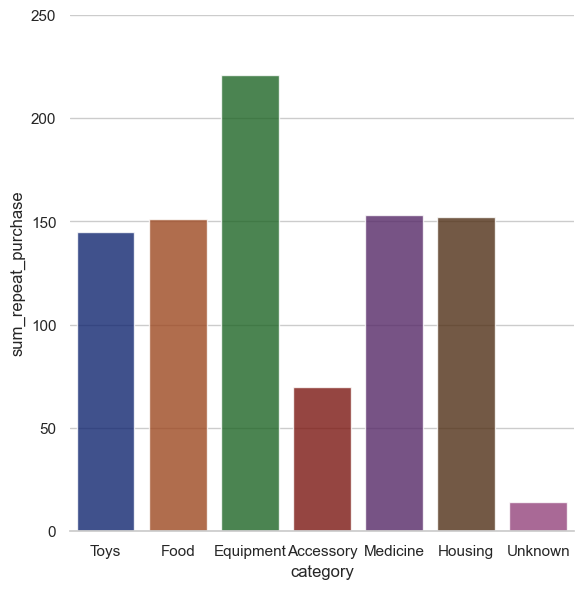

In [29]:
#find the category with most repeat purchases -category -repeat purchases
cat_rep = pet_box_new_df[['category', 'repeat_purchase']]
toy_rep = cat_rep[cat_rep['category'] == 'Toys']
foo_rep = cat_rep[cat_rep['category'] == 'Food']
equ_rep = cat_rep[cat_rep['category'] == 'Equipment']
acc_rep = cat_rep[cat_rep['category'] == 'Accessory']
med_rep = cat_rep[cat_rep['category'] == 'Medicine']
hou_rep = cat_rep[cat_rep['category'] == 'Housing']
unk_rep = cat_rep[cat_rep['category'] == 'Unknown']
sum_toy_rep = toy_rep['repeat_purchase'].sum()
sum_foo_rep = foo_rep['repeat_purchase'].sum()
sum_equ_rep = equ_rep['repeat_purchase'].sum()
sum_acc_rep = acc_rep['repeat_purchase'].sum()
sum_med_rep = med_rep['repeat_purchase'].sum()
sum_hou_rep = hou_rep['repeat_purchase'].sum()
sum_unk_rep = unk_rep['repeat_purchase'].sum()
sum_cat_rep = {'cat':['Toys', 'Food', 'Equipment', 'Accessory','Medicine', 'Housing', 'Unknown'],
               'rep':[sum_toy_rep, sum_foo_rep, sum_equ_rep, sum_acc_rep, sum_med_rep, sum_hou_rep, sum_unk_rep]}
sum_rep = pd.DataFrame(sum_cat_rep)

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=sum_rep, kind="bar",
    x="cat", y="rep",
    errorbar="sd", palette="dark", alpha=.8, height=6)
g.despine(left=True)
g.set_axis_labels("category", "sum_repeat_purchase")
plt.ylim([0, 250])

## Distribution of sales
The sales are not distributed equally over all sales.

<Axes: xlabel='sales', ylabel='product_id'>

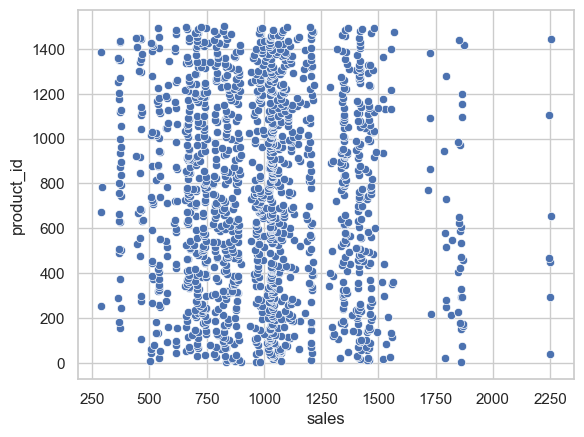

In [30]:
#visualize the distribution over all sales aka -sales -total number of rows
sns.scatterplot(data=pet_box_new_df, x='sales', y='product_id')

## Relationship between Sales and Repeat Purchases
With the picture below we can confirm that there is not a significant correlation between sales and repepat purchases. I can also say that there is more correlation between sales and one time purchases.  

<Axes: xlabel='repeat_purchase', ylabel='sales'>

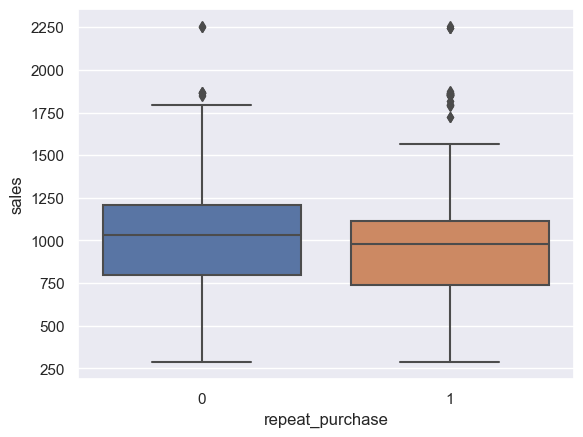

In [66]:
#visualize the correlation between sales and repeat purchases -sales -repeat purchases
new_pet_box = pet_box_new_df[['sales', 'repeat_purchase', 'product_id']]
new_pet_box_df = pd.DataFrame(new_pet_box)

sns.set_theme(style="darkgrid")
sns.boxplot(data=new_pet_box_df, x='repeat_purchase', y='sales')